# Audio Classification Data Preprocessing

In [1]:
### Read a sample audio using librosa
import librosa
audio_file_path=r"C:\Users\USER\Desktop\CSE714\UrbanSound8K\UrbanSound8K\dog_bark.wav"
librosa_audio_data,librosa_sample_rate=librosa.load(audio_file_path)

In [2]:
print(librosa_audio_data)

[ 0.          0.          0.         ... -0.00792928 -0.00775586
 -0.00803613]


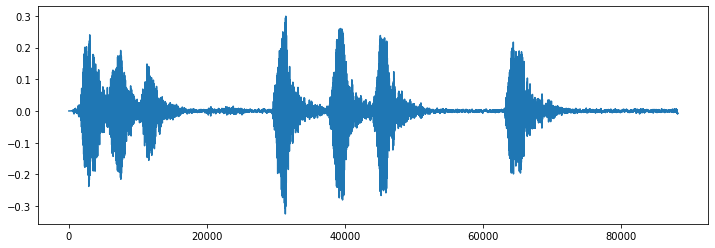

In [3]:
### Lets plot the librosa audio data
import matplotlib.pyplot as plt
# Original audio with 1 channel 
plt.figure(figsize=(12, 4))
plt.plot(librosa_audio_data)
plt.show()

# Observation
Here Librosa converts the signal to mono, meaning the channel will alays be 1

In [4]:
### Lets read with scipy
from scipy.io import wavfile as wav
wave_sample_rate, wave_audio = wav.read(audio_file_path)

In [5]:
wave_audio

array([[   0,    0],
       [   0,    0],
       [   0,    0],
       ...,
       [-399, -115],
       [-388, -111],
       [-386, -105]], dtype=int16)

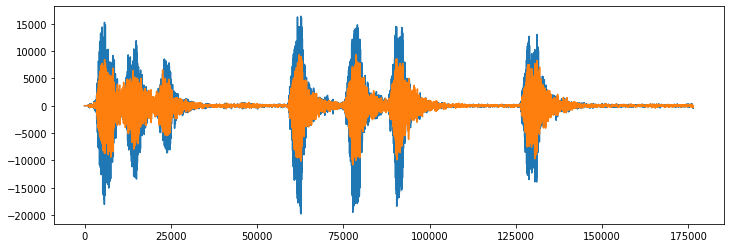

In [6]:
import matplotlib.pyplot as plt

# Original audio with 2 channels 
plt.figure(figsize=(12, 4))
plt.plot(wave_audio)
plt.show()

# Extract Features
Here we will be using Mel-Frequency Cepstral Coefficients(MFCC) from the audio samples. The MFCC summarises the frequency distribution across the window size, so it is possible to analyse both the frequency and time characteristics of the sound. These audio representations will allow us to identify features for classification.

In [7]:
mfccs = librosa.feature.mfcc(y=librosa_audio_data, sr=librosa_sample_rate, n_mfcc=40)
print(mfccs.shape)

(40, 173)


In [8]:
mfccs

array([[-5.7041687e+02, -5.0580991e+02, -4.4661014e+02, ...,
        -4.8128598e+02, -4.7245920e+02, -4.6425223e+02],
       [ 3.2360123e+01,  9.3758621e+01,  1.4270894e+02, ...,
         1.0403226e+02,  1.1474977e+02,  1.1683746e+02],
       [ 2.6088978e+01,  3.4996727e+01,  4.0650410e+01, ...,
         1.1899883e+01,  1.7138599e+01,  1.3888447e+01],
       ...,
       [ 5.9291482e-01,  2.7261491e+00, -2.6107359e+00, ...,
        -2.7341025e+00, -3.7576876e+00, -5.8969660e+00],
       [-1.3069456e+00, -2.1206613e+00, -9.1924059e-01, ...,
        -1.2278621e+00, -3.3732715e+00, -4.1964679e+00],
       [-2.0638514e+00, -2.9027750e+00,  2.7277592e-01, ...,
        -1.3872170e+00, -3.3258367e+00, -8.4754682e-01]], dtype=float32)

In [10]:
#### Extracting MFCC's For every audio file
import pandas as pd
import os
import librosa

audio_dataset_path=r'C:\Users\USER\Desktop\CSE714\UrbanSound8K\UrbanSound8K\audio'
metadata=pd.read_csv(r'C:\Users\USER\Desktop\CSE714\UrbanSound8K\UrbanSound8K\metadata/UrbanSound8K.csv')
metadata.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [13]:
def features_extractor(file):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features
    

In [14]:
import numpy as np
from tqdm import tqdm
### Now we iterate through every audio file and extract features 
### using Mel-Frequency Cepstral Coefficients
extracted_features=[]
for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    final_class_labels=row["class"]
    data=features_extractor(file_name)
    extracted_features.append([data,final_class_labels])

3554it [05:54, 11.34it/s]C:\Users\USER\Anaconda3\envs\tf\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1323
  return f(*args, **kwargs)
8324it [13:06, 18.39it/s]C:\Users\USER\Anaconda3\envs\tf\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1103
  return f(*args, **kwargs)
C:\Users\USER\Anaconda3\envs\tf\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1523
  return f(*args, **kwargs)
8732it [13:33, 10.74it/s]


In [15]:
### converting extracted_features to Pandas dataframe
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()

,feature,class
0,"[-218.18938, 71.38549, -131.49442, -52.25892, ...",dog_bark
1,"[-425.05234, 110.67095, -54.192833, 62.045414,...",children_playing
2,"[-459.82623, 122.82864, -47.908062, 53.302677,...",children_playing
3,"[-414.82184, 102.94826, -36.65685, 54.170742, ...",children_playing
4,"[-447.60776, 115.08627, -53.74607, 61.55309, 1...",children_playing


In [16]:
### Split the dataset into independent and dependent dataset
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())

In [17]:
X.shape

(8732, 40)

In [18]:
y.shape

(8732,)

In [19]:
y

array(['dog_bark', 'children_playing', 'children_playing', ...,
       'car_horn', 'car_horn', 'car_horn'], dtype='<U16')

In [20]:
### Label Encoding
###y=np.array(pd.get_dummies(y))
### Label Encoder
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))

In [21]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [22]:
### Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)


In [23]:
X_train

array([[-1.3211458e+02,  1.1391494e+02, -2.3927406e+01, ...,
         3.3260243e+00, -1.4790288e+00,  2.8912871e+00],
       [-1.4296137e+01,  9.1951004e+01, -8.6025953e+00, ...,
        -3.3708370e+00, -5.2008624e+00, -1.5975085e+00],
       [-4.9827820e+01,  1.8449393e-01, -2.0364500e+01, ...,
         2.0259936e+00, -8.3159244e-01,  2.7930872e+00],
       ...,
       [-4.2723694e+02,  9.2938095e+01,  2.8287885e+00, ...,
         8.1411356e-01,  6.6066748e-01,  7.8365982e-01],
       [-1.4640692e+02,  1.3716916e+02, -3.4362492e+01, ...,
         1.3839476e+00, -1.9667517e+00, -8.8792092e-01],
       [-4.2171307e+02,  2.1160454e+02,  2.5852377e+00, ...,
        -5.1338639e+00, -3.6135261e+00, -1.3413877e+00]], dtype=float32)

In [24]:
X_train.shape

(6985, 40)

In [25]:
X_test.shape

(1747, 40)

In [26]:
y_train.shape

(6985, 10)

In [27]:
y_test.shape

(1747, 10)

# Model Creation

In [28]:
import tensorflow as tf
print(tf.__version__)

2.4.1


In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [30]:
### Number of classes
num_labels=y.shape[1]

In [31]:
model=Sequential()
###first layer
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

###final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               4100      
_________________________________________________________________
activation (Activation)      (None, 100)               0         
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 200)               20200     
_________________________________________________________________
activation_1 (Activation)    (None, 200)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               2

In [33]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [36]:
## Trianing my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 200
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/200
219/219 [==============================] - 1s 3ms/step - loss: 0.9770 - accuracy: 0.6790 - val_loss: 0.8248 - val_accuracy: 0.7499

Epoch 00001: val_loss improved from inf to 0.82479, saving model to saved_models\audio_classification.hdf5
Epoch 2/200
219/219 [==============================] - 1s 3ms/step - loss: 1.0065 - accuracy: 0.6740 - val_loss: 0.8111 - val_accuracy: 0.7573

Epoch 00002: val_loss improved from 0.82479 to 0.81111, saving model to saved_models\audio_classification.hdf5
Epoch 3/200
219/219 [==============================] - 1s 4ms/step - loss: 1.0087 - accuracy: 0.6646 - val_loss: 0.8154 - val_accuracy: 0.7459

Epoch 00003: val_loss did not improve from 0.81111
Epoch 4/200
219/219 [==============================] - 1s 3ms/step - loss: 1.0051 - accuracy: 0.6663 - val_loss: 0.8133 - val_accuracy: 0.7533

Epoch 00004: val_loss did not improve from 0.81111
Epoch 5/200
219/219 [==============================] - 1s 4ms/step - loss: 0.9805 - accuracy: 0.6782 - v

219/219 [==============================] - 1s 3ms/step - loss: 0.9639 - accuracy: 0.6802 - val_loss: 0.7804 - val_accuracy: 0.7693

Epoch 00040: val_loss did not improve from 0.77491
Epoch 41/200
219/219 [==============================] - 1s 3ms/step - loss: 0.9397 - accuracy: 0.6911 - val_loss: 0.7825 - val_accuracy: 0.7624

Epoch 00041: val_loss did not improve from 0.77491
Epoch 42/200
219/219 [==============================] - 1s 3ms/step - loss: 0.9291 - accuracy: 0.6978 - val_loss: 0.7947 - val_accuracy: 0.7642

Epoch 00042: val_loss did not improve from 0.77491
Epoch 43/200
219/219 [==============================] - 1s 3ms/step - loss: 0.9546 - accuracy: 0.6898 - val_loss: 0.7777 - val_accuracy: 0.7665

Epoch 00043: val_loss did not improve from 0.77491
Epoch 44/200
219/219 [==============================] - 1s 3ms/step - loss: 0.9388 - accuracy: 0.6928 - val_loss: 0.7726 - val_accuracy: 0.7756

Epoch 00044: val_loss improved from 0.77491 to 0.77256, saving model to saved_models


Epoch 00080: val_loss did not improve from 0.75077
Epoch 81/200
219/219 [==============================] - 1s 6ms/step - loss: 0.9240 - accuracy: 0.6995 - val_loss: 0.7478 - val_accuracy: 0.7722

Epoch 00081: val_loss improved from 0.75077 to 0.74776, saving model to saved_models\audio_classification.hdf5
Epoch 82/200
219/219 [==============================] - 1s 4ms/step - loss: 0.9068 - accuracy: 0.7049 - val_loss: 0.7350 - val_accuracy: 0.7825

Epoch 00082: val_loss improved from 0.74776 to 0.73501, saving model to saved_models\audio_classification.hdf5
Epoch 83/200
219/219 [==============================] - 1s 3ms/step - loss: 0.9469 - accuracy: 0.6892 - val_loss: 0.7441 - val_accuracy: 0.7687

Epoch 00083: val_loss did not improve from 0.73501
Epoch 84/200
219/219 [==============================] - 1s 3ms/step - loss: 0.9177 - accuracy: 0.7059 - val_loss: 0.7460 - val_accuracy: 0.7728

Epoch 00084: val_loss did not improve from 0.73501
Epoch 85/200
219/219 [======================

219/219 [==============================] - 1s 4ms/step - loss: 0.9005 - accuracy: 0.7122 - val_loss: 0.7698 - val_accuracy: 0.7745

Epoch 00121: val_loss did not improve from 0.71691
Epoch 122/200
219/219 [==============================] - 1s 4ms/step - loss: 0.9029 - accuracy: 0.7044 - val_loss: 0.7352 - val_accuracy: 0.7733

Epoch 00122: val_loss did not improve from 0.71691
Epoch 123/200
219/219 [==============================] - 1s 4ms/step - loss: 0.9071 - accuracy: 0.7014 - val_loss: 0.7464 - val_accuracy: 0.7750

Epoch 00123: val_loss did not improve from 0.71691
Epoch 124/200
219/219 [==============================] - 1s 4ms/step - loss: 0.9199 - accuracy: 0.7064 - val_loss: 0.7335 - val_accuracy: 0.7899

Epoch 00124: val_loss did not improve from 0.71691
Epoch 125/200
219/219 [==============================] - 1s 3ms/step - loss: 0.8992 - accuracy: 0.7098 - val_loss: 0.7258 - val_accuracy: 0.7888

Epoch 00125: val_loss did not improve from 0.71691
Epoch 126/200
219/219 [======

219/219 [==============================] - 1s 3ms/step - loss: 0.9035 - accuracy: 0.7122 - val_loss: 0.7302 - val_accuracy: 0.7888

Epoch 00162: val_loss did not improve from 0.69509
Epoch 163/200
219/219 [==============================] - 1s 3ms/step - loss: 0.8990 - accuracy: 0.7110 - val_loss: 0.7207 - val_accuracy: 0.7808

Epoch 00163: val_loss did not improve from 0.69509
Epoch 164/200
219/219 [==============================] - 1s 3ms/step - loss: 0.9003 - accuracy: 0.7174 - val_loss: 0.7243 - val_accuracy: 0.7796

Epoch 00164: val_loss did not improve from 0.69509
Epoch 165/200
219/219 [==============================] - 1s 3ms/step - loss: 0.8686 - accuracy: 0.7158 - val_loss: 0.7468 - val_accuracy: 0.7848

Epoch 00165: val_loss did not improve from 0.69509
Epoch 166/200
219/219 [==============================] - 1s 3ms/step - loss: 0.8891 - accuracy: 0.7128 - val_loss: 0.7129 - val_accuracy: 0.7911

Epoch 00166: val_loss did not improve from 0.69509
Epoch 167/200
219/219 [======

In [37]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.7979393005371094


In [39]:
X_test[1]

array([-466.47327   ,    1.5016655 ,  -34.40004   ,   35.6894    ,
        -15.182925  ,  -18.883924  ,   -0.7577302 ,  -16.028217  ,
        -21.365473  ,    7.6201305 ,  -29.034496  ,  -19.153776  ,
         -2.6873193 ,   -8.493191  ,  -14.771136  ,   -7.0288925 ,
         -7.1169453 ,    8.868939  ,   14.91199   ,   21.457466  ,
         21.327414  ,    0.88716304,  -18.810377  ,   -5.017963  ,
         -0.70585895,    2.9008534 ,   -6.7110267 ,  -16.64986   ,
         -9.831696  ,   12.847431  ,    0.661925  ,  -23.943693  ,
        -15.194155  ,    9.193657  ,   10.399715  ,   -0.59991825,
         -1.2594265 ,   17.706207  ,   13.831076  ,   -5.1632876 ],
      dtype=float32)

In [40]:
model.predict_classes(X_test)

C:\Users\USER\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([5, 3, 4, ..., 1, 2, 2], dtype=int64)

# Testing Some Test Audio Data
Steps

-  Preprocess the new audio data
-  predict the classes
-  Invere transform your Predicted Label

In [44]:
filename=r"C:\Users\USER\Desktop\CSE714\UrbanSound8K\UrbanSound8K\116423-2-0-4.wav"
audio, sample_rate = librosa.load(filename, res_type='kaiser_fast') 
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)

print(mfccs_scaled_features)
mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1)
print(mfccs_scaled_features)
print(mfccs_scaled_features.shape)
predicted_label=model.predict_classes(mfccs_scaled_features)
print(predicted_label)
prediction_class = labelencoder.inverse_transform(predicted_label) 
prediction_class

[-1.60774933e+02  8.17618561e+01 -1.20303246e+02  1.26759834e+01
 -2.18464642e+01  1.96928768e+01 -1.07632256e+01  5.95477343e+00
 -4.48908710e+00  1.49121571e+01  1.81518924e+00  4.58749628e+00
 -3.93229127e-01  4.41544628e+00 -2.54397893e+00  1.31126928e+00
 -5.08690977e+00  1.97287953e+00 -1.54079127e+00  2.08516669e+00
  1.76911736e+00 -3.57263541e+00 -3.96245599e+00 -1.61939955e+00
 -4.83732462e-01 -1.80066431e+00 -2.22713566e+00 -4.92226005e-01
 -1.23983353e-01 -5.34457207e+00 -1.88181746e+00 -2.21038985e+00
 -2.72198856e-01 -1.55150488e-01 -1.98196268e+00 -2.54599762e+00
 -2.14823008e+00 -1.34927726e+00 -3.62413585e-01 -4.57206517e-01]
[[-1.60774933e+02  8.17618561e+01 -1.20303246e+02  1.26759834e+01
  -2.18464642e+01  1.96928768e+01 -1.07632256e+01  5.95477343e+00
  -4.48908710e+00  1.49121571e+01  1.81518924e+00  4.58749628e+00
  -3.93229127e-01  4.41544628e+00 -2.54397893e+00  1.31126928e+00
  -5.08690977e+00  1.97287953e+00 -1.54079127e+00  2.08516669e+00
   1.76911736e+00 -

array(['children_playing'], dtype='<U16')